# Contents <a id='back'></a>

* [Introduction](#intro)
* [Stage 1. Data overview](#data_review)
* [Stage 2. Data preprocessing](#data_preprocessing)
    * [2.1 Duplicates](#duplicates)
    * [2.2 Missing values and data types](#missing_values_data_types)
* [Stage 3. Analysis](#analysis)
    * [3.1 Easy](#easy)
    * [3.2 Medium](#medium)
    * [3.3 Hard](#hard)
* [Conclusions](#conclusions)

## Introduction <a id='introduction'></a>


In this project, we'll be working with a modified version of the Instacart dataset, which contains data from the popular grocery delivery platform Instacart.

Instacart allows customers to place grocery orders online and have them delivered to their doorstep, similar to services like Uber Eats and DoorDash. The dataset we'll be using was originally released by Instacart for a Kaggle competition in 2017.

### Goal:

The goal in this project is to clean up the data and prepare a report that provides insights into the shopping habits of Instacart customers. We'll be answering various questions and performing analyses to uncover patterns and trends in the data.

### Stages:

The project is divided into three steps:

#### Step 1: Data Exploration

- Opening the data files and examining the general contents of each table.
- Setting certain arguments in pd.read_csv() to read the data correctly due to nonstandard formatting.
- Noting any observations or patterns in the data files.

#### Step 2: Data Preprocessing

- Verifying and fixing data types, ensuring ID columns are integers where appropriate.
- Handling missing values by identifying and filling them in with appropriate methods.
- Identifying and removing duplicate values to ensure data integrity.
- Explaining the types of missing and duplicate values found, the methods used to address them, and the reasons behind those methods.

#### Step 3: Data Analysis

- Performing analyses to answer questions categorized as Easy, Medium, and Hard tasks.
- Verifying the sensibility of certain columns, such as 'order_hour_of_day' and 'order_dow', and create plots to visualize order patterns.
- Conducting analyses to identify trends and patterns in customer behavior, such as the distribution of order hour of the day, day of the week people shop for groceries, and the time people wait until placing their next order.
- Answering questions of increasing complexity, ranging from differences in order hour distributions on specific days to calculating reorder proportiofor each product.
ns for each product.
s for each product.
ns for each product.
t.

## Stage 1. Data overview <a id='data_review'></a>


In [1]:
# importing pandas library 
import pandas as pd

In [2]:
# importing the pyplot library
from matplotlib import pyplot as plt

In [3]:
# reading the files and storing it to df
df_instacarts = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
df_products = pd.read_csv('/datasets/products.csv', sep=';')
df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
df_departments = pd.read_csv('/datasets/departments.csv', sep=';')
df_order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

In [4]:
# obtaining the first 10 rows from the table
df_instacarts.head(10)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
5,1843871,20084,5,0,11,15.0
6,2511640,148233,40,3,8,2.0
7,2521283,97711,2,0,18,22.0
8,2266494,34954,40,5,15,4.0
9,446014,15356,2,4,8,10.0


In [5]:
# obtaining general information about the data
df_instacarts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [6]:
# obtaining the first 10 rows from the table
df_products.head(10)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [7]:
# obtaining general information about the data
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [8]:
# obtaining the first 10 rows from the table
df_aisles.head(10)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


In [9]:
# obtaining general information about the data
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [10]:
# obtaining the first 10 rows from the table
df_departments.head(10)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [11]:
# obtaining general information about the data
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [12]:
# obtaining the first 10 rows from the table
df_order_products.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
5,2456893,21616,4.0,1
6,644579,12341,5.0,1
7,2231852,44925,10.0,1
8,3185766,36259,14.0,1
9,420019,23315,4.0,1


In [13]:
# obtaining general information about the data
df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


#### Conclusion

During the Data Exploration stage, we opened the data files, examined the contents of each table, and noted any nonstandard formatting. We also set appropriate arguments in pd.read_csv() to read the data correctly, ensuring we could proceed with further analysis.

## Stage 2. Data preprocessing <a id='data_preprocessing'></a>

### Duplicates <a id='duplicates'></a>

#### Instacarts data frame <a id='Instacarts data frame'></a>

In [14]:
# checking for duplicate rows in the DataFrame df_instacarts
df_instacarts.duplicated().sum()

15

In [15]:
# displaying the selected duplicate rows
dup_insta = df_instacarts[df_instacarts.duplicated()]
dup_insta

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


The duplicates appear to be at the same day of the week and and the same hour

In [16]:
# removing duplicates and resetting from the dataframe
df_instacarts = df_instacarts.drop_duplicates().reset_index(drop=True)

In [17]:
# checking if they were removed
df_instacarts.duplicated().sum()

0

In [18]:
# double checking for duplicate 'order_id' only
df_instacarts['order_id'].value_counts()

1048576    1
3389216    1
1100604    1
1275704    1
2337103    1
          ..
1752059    1
2794488    1
711671     1
1711087    1
2047       1
Name: order_id, Length: 478952, dtype: int64

In [19]:
# the only column that cannot have the same values is 'order_id'
# checking for duplicated "order_id"
df_instacarts.duplicated(subset=['order_id']).sum()

0

#### Products data frame <a id='Products data frame'></a>

In [20]:
# checking for duplicated rows
df_products.duplicated().sum()

0

In [21]:
# checking for duplicated "product_id"
df_products.duplicated(subset=['product_id']).sum()

0

#### Aisles data frame <a id='Aisles data frame'></a>

In [22]:
df_aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [23]:
# checking for duplicated rows
df_aisles.duplicated().sum()

0

In [24]:
# checking just for duplicated aisle names(converting them to lowercase)
df_aisles['aisle'] = df_aisles['aisle'].str.lower()
df_aisles.duplicated(subset=['aisle']).sum()

0

In [25]:
df_aisles.duplicated(subset=['aisle_id']).sum()

0

#### Departments data frame <a id='departments data frame'></a>

In [26]:
df_departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [27]:
# checking for duplicated rows
df_departments.duplicated().sum()

0

In [28]:
# checking just for duplicated department names(converting them to lowercase)
df_departments['department'] = df_departments['department'].str.lower()
df_departments.duplicated(subset=['department']).sum()

0

#### Order_products data frame <a id='order_products data frame'></a>

In [29]:
df_order_products

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


In [30]:
# checking for duplicated rows
df_order_products.duplicated().sum()

0

In [31]:
# double checking for tricky duplicated 
df_order_products.duplicated(subset=['order_id','product_id']).sum()

0

### Missing values and data types <a id='missing_values_data_types'></a>

#### Instacarts data frame <a id='Instacarts data frame'></a>

In [32]:
# counting missing values
df_instacarts.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [33]:
# checking the hypothesis that the missing values come from the reason because it's the customers first order
df_instacarts[df_instacarts.days_since_prior_order.isna()]['order_number'].unique()    

array([1])

Yes, it proves our hypothesis, we can leave the missing values as Nan.

In [34]:
df_instacarts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [35]:
# converting the data type of the days_since_prior_order to 'int', replacing the missing values with a placeholder (-1) to make the changes
df_instacarts['days_since_prior_order'] = df_instacarts['days_since_prior_order'].fillna(-1).astype(int)

In [36]:
# checking the changes
df_instacarts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   order_id                478952 non-null  int64
 1   user_id                 478952 non-null  int64
 2   order_number            478952 non-null  int64
 3   order_dow               478952 non-null  int64
 4   order_hour_of_day       478952 non-null  int64
 5   days_since_prior_order  478952 non-null  int64
dtypes: int64(6)
memory usage: 21.9 MB


In [37]:
# checking the changes
df_instacarts.isna().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

#### Products data frame <a id='products data frame'></a>

In [38]:
# counting missing values
df_products.isna().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [39]:
# selecting rows with missing product names
df_products[df_products.product_name.isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


In [40]:
# are all the missing product names associated with aisle ID 100?
df_products[df_products.product_name.isna()]['aisle_id'].unique()

array([100])

Yes, the missing product names are only associated with the aisle ID 100

In [41]:
# are all the missing product names associated with department ID 21?
df_products[df_products.product_name.isna()]['department_id'].unique()

array([21])

Yes, the missing product names are only associated with the depatment ID 21

In [42]:
# checking what is the aisle and department
display(df_aisles[df_aisles['aisle_id'] == 100])
display(df_departments[df_departments['department_id'] == 21])

,aisle_id,aisle
99,100,missing


,department_id,department
20,21,missing


We can assume that in the current dataframe every missing product name is automatically put in the missing 'aisle' and 'department'

In [43]:
# filling missing product names with "Unknown"
df_products.product_name = df_products.product_name.fillna('Unknown')
df_products.isna().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

#### Aisles data frame <a id='Aisles data frame'></a>

In [44]:
# counting missing values
df_aisles.isna().sum()

aisle_id    0
aisle       0
dtype: int64

#### Departments data frame <a id='departments data frame'></a>

In [45]:
# counting missing values
df_departments.isna().sum()

department_id    0
department       0
dtype: int64

#### Order_products data frame <a id='order_products data frame'></a>

In [46]:
# counting missing values
df_order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [47]:
# checking the minimum and maximum valus in the 'add_to_cart_order' column
df_order_products.add_to_cart_order.describe().astype(int)  

count    4544171
mean           8
std            7
min            1
25%            3
50%            6
75%           11
max           64
Name: add_to_cart_order, dtype: int64

The mininmum value is 1.

The maximum value is 64.

In [48]:
# saving all order IDs with the missing values in the add_to_cart_order
df_order_products[df_order_products.add_to_cart_order.isna()]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [49]:
# selecting unique order IDs with missing add_to_cart_order values
order_missing = list(df_order_products[df_order_products.add_to_cart_order.isna()]['order_id'].unique())
order_missing

[2449164,
 1968313,
 2926893,
 1717990,
 1959075,
 844733,
 61355,
 936852,
 264710,
 1564093,
 129627,
 293169,
 2849370,
 1386261,
 3308010,
 903110,
 2136777,
 3347453,
 1888628,
 165801,
 2094761,
 1038146,
 2997021,
 813364,
 2256933,
 171934,
 2409109,
 1730767,
 1169835,
 733526,
 404157,
 3125735,
 747668,
 1800005,
 1961723,
 871281,
 388234,
 1648217,
 1477139,
 102236,
 1021563,
 1832957,
 2721963,
 678116,
 1220886,
 1673227,
 2999801,
 1633337,
 2470674,
 2625444,
 1677118,
 2479011,
 3383594,
 1183255,
 1713430,
 2652650,
 1598369,
 1916118,
 854647,
 1302315,
 888470,
 180546,
 2621907,
 1308785,
 2729254,
 9310,
 2170451,
 2979697,
 1625713,
 1529171]

In [50]:
# checking the hypothesis that all orders with missing values have more that 64(max) products
# filtering the datd and leaving only rows where order_id belongs to the ones with missing values
df_order_products[df_order_products.order_id.isin(order_missing)]

,order_id,product_id,add_to_cart_order,reordered
267,2094761,31469,57.0,1
737,2449164,5068,NaN,0
1742,2997021,4920,37.0,0
3463,871281,40063,61.0,1
3535,171934,36397,7.0,0
...,...,...,...,...
4543519,2621907,32018,28.0,1
4544672,102236,34688,49.0,0
4544708,2256933,41544,21.0,0
4544771,180546,12741,46.0,1


In [51]:
# do all orders with missing values have mor than 64 products?
df_order_products[df_order_products.order_id.isin(order_missing)].groupby(['order_id'])['product_id'].nunique()

order_id
9310        65
61355      127
102236      95
129627      69
165801      70
          ... 
2999801     70
3125735     86
3308010    115
3347453     71
3383594     69
Name: product_id, Length: 70, dtype: int64

In [52]:
(df_order_products[df_order_products.order_id.isin(order_missing)].groupby(['order_id'])['product_id'].nunique()>64).value_counts()

True    70
Name: product_id, dtype: int64

The hypothesis is true. All orders with missing values indeed contain more than 64 unique products. This is confirmed by the length of the resulting DataFrame, which is 70.

In [53]:
# converting the data type of the add_to_cart_order to 'int', replacing the missing values with a placeholder (-1) to make the changes
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(-1).astype(int)

In [54]:
# checking the changes
df_order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


In [55]:
# checking the changes
df_order_products.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

#### Conclusion

In the Data Preprocessing stage, we verified and fixed data types, handled missing values, and identified and removed duplicate values. We explained the types of missing and duplicate values found, the methods used to address them, and the reasons behind those methods to ensure data integrity.


## Stage 3. Analysis <a id='analysis'></a>


### Easy <a id='easy'></a>

**1.Verify that values in the 'order_hour_of_day' and 'order_dow' columns in the orders table are sensible (i.e. 'order_hour_of_day' ranges from 0 to 23 and 'order_dow' ranges from 0 to 6).**


In [56]:
# checking 'order_hour_of_day' column
display(sorted(df_instacarts['order_hour_of_day'].unique()))
# checking 'order_dow' column
display(sorted(df_instacarts['order_dow'].unique()))


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

[0, 1, 2, 3, 4, 5, 6]

The values in the 'order_hour_of_day' column range from 0 to 23, which is within the expected range. Similarly, the values in the 'order_dow' column range from 0 to 6, corresponding to the days of the week (with 0 representing Sunday and 6 representing Saturday). Therefore, both columns contain sensible values within the specified ranges.

**2.Create a plot that shows how many people place orders for each hour of the day.**

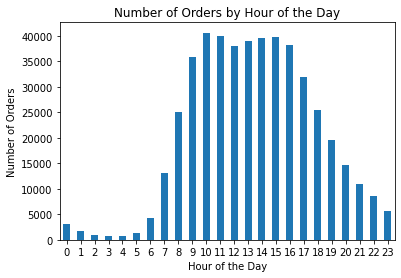

In [57]:
# grouping the data by 'order_hour_of_day' and count the number of orders
hourly_order_counts = df_instacarts['order_hour_of_day'].value_counts().sort_index()

# creating a bar plot
hourly_order_counts.plot(kind='bar', 
title = 'Number of Orders by Hour of the Day',
xlabel = 'Hour of the Day',
ylabel = 'Number of Orders')
plt.xticks(rotation=0)

plt.show()

We observed that the majority of orders were placed during the daytime hours, with peaks between 10 - 11 am.

**3.Create a plot that shows what day of the week people shop for groceries.**

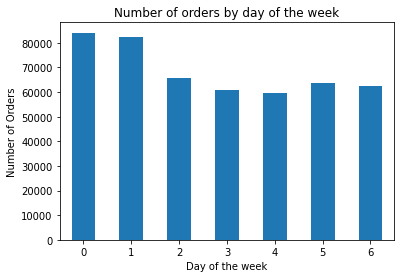

In [58]:
# grouping the data by 'order_dow' and count the number of orders
dow_order_counts = df_instacarts['order_dow'].value_counts().sort_index()

# creating a bar plot
dow_order_counts.plot(kind='bar', 
title = 'Number of orders by day of the week',
xlabel = 'Day of the week',
ylabel = 'Number of Orders')
plt.xticks(rotation=0)

plt.show()

Customers tend to shop for groceries throughout Sunday and Monday.

**4.Create a plot that shows how long people wait until placing their next order, and comment on the minimum and maximum values.**

In [59]:
# filtering out missing values (-1) from the 'days_since_prior_order' column
valid_days_since_prior_order = df_instacarts['days_since_prior_order'][df_instacarts['days_since_prior_order'] != -1]

valid_days_since_prior_order.describe()

count    450135.000000
mean         11.101814
std           9.190004
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64

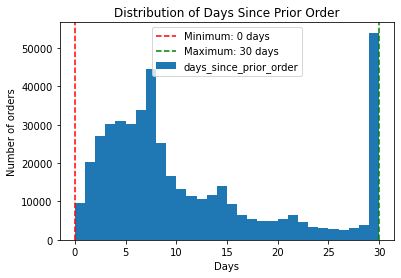

In [60]:
# Creating a histogram to visualize the distribution
valid_days_since_prior_order.plot(kind='hist',
                                  bins = 30,
                                  title='Distribution of Days Since Prior Order')

# Adding vertical lines for minimum and maximum values
min_value = valid_days_since_prior_order.min()
max_value = valid_days_since_prior_order.max()
plt.axvline(x=min_value, color='red', linestyle='--', label=f'Minimum: {min_value} days')
plt.axvline(x=max_value, color='green', linestyle='--', label=f'Maximum: {max_value} days')

plt.xlabel('Days')
plt.ylabel('Number of orders')
plt.legend()
plt.show()



The time customers wait until their next order exhibits significant variation. While the average waiting period is approximately 7 days, there exists a wide range of waiting times, reflecting diverse shopping behaviors among customers. The noticeable spike in the number of orders occurring at day 30 can be attributed to the inclusion of all orders placed after 30 days or more.

### Medium <a id='medium'></a>

**1.Is there a difference in 'order_hour_of_day' distributions on Wednesdays and Saturdays? Plot the histograms for both days on the same plot and describe the differences that you see.**

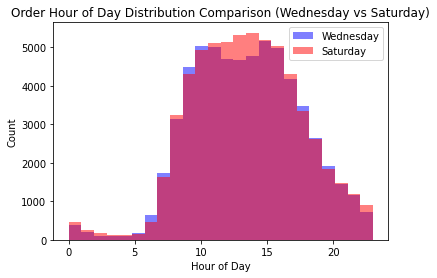

In [61]:
# filtering the data for Wednesdays and Saturdays
wednesday_data = df_instacarts[df_instacarts['order_dow'] == 3]  
saturday_data = df_instacarts[df_instacarts['order_dow'] == 6]   

# creating histograms for both days
plt.hist(wednesday_data['order_hour_of_day'], bins=24, alpha=0.5, label='Wednesday', color='blue')
plt.hist(saturday_data['order_hour_of_day'], bins=24, alpha=0.5, label='Saturday', color='red')

plt.title('Order Hour of Day Distribution Comparison (Wednesday vs Saturday)')
plt.xlabel('Hour of Day')
plt.ylabel('Count')

plt.legend()
plt.show()

We can only see that there is a slight differnce in the ammount of orders but regarding the hour they make the orders - its the same.

**2.Plot the distribution for the number of orders that customers place (e.g. how many customers placed only 1 order, how many placed only 2, how many only 3, and so on…)**

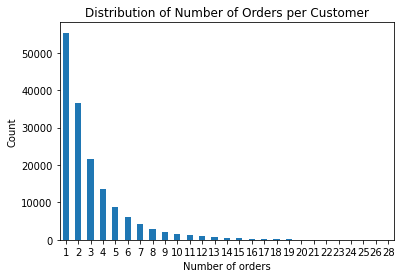

In [62]:
# counting the number of orders for each user
order_counts = df_instacarts['user_id'].value_counts()

# counting the frequency of each unique number of orders
order_distribution = order_counts.value_counts().sort_index()

# creating a bar plot
order_distribution.plot(kind='bar', 
                        title='Distribution of Number of Orders per Customer',
                        xlabel='Number of orders', 
                        ylabel='Count')
plt.xticks(rotation=0)
plt.show()

The plot illustrates that the majority of customers place only one order.

**3.What are the top 20 products that are ordered most frequently (display their id and name)?**

In [63]:
df_order_products

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1
...,...,...,...,...
4545002,577211,15290,12,1
4545003,1219554,21914,9,0
4545004,692640,47766,4,1
4545005,319435,691,8,1


In [64]:
# counting occurrences of each product_id and resetting index
popular_products = df_order_products['product_id'].value_counts().reset_index()
popular_products

,index,product_id
0,24852,66050
1,13176,53297
2,21137,37039
3,21903,33971
4,47209,29773
...,...,...
45568,10543,1
45569,5222,1
45570,2347,1
45571,11893,1


In [65]:
# selecting the top 20 products based on their popularity
# renaming columns for clarity
top_20_products = popular_products[0:20]
top_20_products.columns=['product_id','orders']
top_20_products

,product_id,orders
0,24852,66050
1,13176,53297
2,21137,37039
3,21903,33971
4,47209,29773
5,47766,24689
6,47626,21495
7,16797,20018
8,26209,19690
9,27845,19600


In [66]:
# merging top 20 products with product names
top_20_products.merge(df_products[['product_id','product_name']],how='left', on=['product_id'])

,product_id,orders,product_name
0,24852,66050,Banana
1,13176,53297,Bag of Organic Bananas
2,21137,37039,Organic Strawberries
3,21903,33971,Organic Baby Spinach
4,47209,29773,Organic Hass Avocado
5,47766,24689,Organic Avocado
6,47626,21495,Large Lemon
7,16797,20018,Strawberries
8,26209,19690,Limes
9,27845,19600,Organic Whole Milk


The distribution of products reveals varying order frequencies, with "Banana" emerging as highly popular while others have lower frequencies. Notably, several organic products feature prominently in the top 20, indicating a preference for organic options among customers.

### Hard <a id='hard'></a>

**1.What are the top 20 items that are reordered most frequently (display their names and product IDs)?**

In [67]:
df_order_products

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1
...,...,...,...,...
4545002,577211,15290,12,1
4545003,1219554,21914,9,0
4545004,692640,47766,4,1
4545005,319435,691,8,1


In [68]:
# selecting rows where 'reordered' column is equal to 1
reordered = df_order_products[df_order_products['reordered']==1]
reordered

,order_id,product_id,add_to_cart_order,reordered
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1
5,2456893,21616,4,1
...,...,...,...,...
4544999,1622300,24852,1,1
4545000,1125324,40600,6,1
4545002,577211,15290,12,1
4545004,692640,47766,4,1


In [69]:
# counting occurrences of each product_id in reordered data
popular_reorders = reordered['product_id'].value_counts().reset_index()
popular_reorders

,index,product_id
0,24852,55763
1,13176,44450
2,21137,28639
3,21903,26233
4,47209,23629
...,...,...
36223,2591,1
36224,29201,1
36225,27154,1
36226,10789,1


In [70]:
# selecting the top 20 reordered products
# renaming columns for clarity
top_20_reorders = popular_reorders[0:20]
top_20_reorders.columns=['product_id','orders']
top_20_reorders

,product_id,orders
0,24852,55763
1,13176,44450
2,21137,28639
3,21903,26233
4,47209,23629
5,47766,18743
6,27845,16251
7,47626,15044
8,27966,14748
9,16797,13945


In [71]:
# merging top 20 reordered products with product names
top_20_reorders.merge(df_products[['product_id','product_name']],how='left', on=['product_id'])

,product_id,orders,product_name
0,24852,55763,Banana
1,13176,44450,Bag of Organic Bananas
2,21137,28639,Organic Strawberries
3,21903,26233,Organic Baby Spinach
4,47209,23629,Organic Hass Avocado
5,47766,18743,Organic Avocado
6,27845,16251,Organic Whole Milk
7,47626,15044,Large Lemon
8,27966,14748,Organic Raspberries
9,16797,13945,Strawberries


The analysis reveals the top 20 items most frequently reordered, featuring product names and IDs. Notably, "Banana" stands out as the most reordered item, highlighting its significant popularity among customers. 

**2.What are the top 20 items that people put in their carts first (display the product IDs, product names, and number of times they were the first item added to the cart)?**

In [72]:
df_order_products

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1
...,...,...,...,...
4545002,577211,15290,12,1
4545003,1219554,21914,9,0
4545004,692640,47766,4,1
4545005,319435,691,8,1


In [73]:
# selecting rows where 'add_to_cart_order' column is equal to 1
first_to_cart = df_order_products[df_order_products['add_to_cart_order']==1]
first_to_cart

,order_id,product_id,add_to_cart_order,reordered
1,567889,1560,1,1
2,2261212,26683,1,1
14,1961225,37553,1,1
16,639939,10017,1,1
23,750040,8518,1,0
...,...,...,...,...
4544978,1759009,46175,1,0
4544989,115427,20842,1,1
4544990,2049780,28576,1,1
4544997,2300092,10017,1,0


In [74]:
# counting occurrences of each product_id in first_to_cart data
first_to_cart_counts = first_to_cart['product_id'].value_counts().reset_index()
first_to_cart_counts

,index,product_id
0,24852,15562
1,13176,11026
2,27845,4363
3,21137,3946
4,47209,3390
...,...,...
26755,10628,1
26756,8581,1
26757,35216,1
26758,43412,1


In [75]:
# selecting the top 20 products that are first to be added to cart
# renaming columns for clarity
top_20_first_carts = first_to_cart_counts[0:20]
top_20_first_carts.columns=['product_id','orders']
top_20_first_carts

,product_id,orders
0,24852,15562
1,13176,11026
2,27845,4363
3,21137,3946
4,47209,3390
5,21903,3336
6,47766,3044
7,19660,2336
8,16797,2308
9,27966,2024


In [76]:
# merging top 20 first carts with product names
top_20_first_carts.merge(df_products[['product_id','product_name',]],how='left', on=['product_id'])

,product_id,orders,product_name
0,24852,15562,Banana
1,13176,11026,Bag of Organic Bananas
2,27845,4363,Organic Whole Milk
3,21137,3946,Organic Strawberries
4,47209,3390,Organic Hass Avocado
5,21903,3336,Organic Baby Spinach
6,47766,3044,Organic Avocado
7,19660,2336,Spring Water
8,16797,2308,Strawberries
9,27966,2024,Organic Raspberries


The top 20 items that people put in their carts first have been identified. "Banana" emerges as the most frequently chosen first item, reflecting its popularity and likely status as a staple grocery item for many customers. 

## Conclusions <a id='conclusions'></a>

In conclusion, this project aimed to analyze the shopping habits of Instacart customers using a modified version of the Instacart dataset. We followed a structured approach divided into three main stages: Data Exploration, Data Preprocessing, and Data Analysis.

During the Data Exploration stage, we opened the data files, examined the contents of each table, and noted any nonstandard formatting. We also set appropriate arguments in pd.read_csv() to read the data correctly, ensuring we could proceed with further analysis.

In the Data Preprocessing stage, we verified and fixed data types, handled missing values, and identified and removed duplicate values. We explained the types of missing and duplicate values found, the methods used to address them, and the reasons behind those methods to ensure data integrity.

Finally, in the Data Analysis stage, we performed various analyses to answer questions of varying complexity. We verified the sensibility of certain columns, such as 'order_hour_of_day' and 'order_dow', and created plots to visualize order patterns. We also conducted analyses to identify trends and patterns in customer behavior, such as the distribution of order hour of the day, day of the week people shop for groceries, and the time people wait until placing their next order.

#### Findings:

1. We observed that the majority of orders were placed during the daytime hours, with peaks between 10 - 11 am.
2. Customers tend to shop for groceries throughout Sunday and Monday.
3. The time people wait until their next order varies widely. On average, customers wait about 7 days, but there's a broad range of waiting times, indicating diverse shopping behaviors.
4. There were no big differences in the distribution of order hour of the day between Wednesdays and Saturdays.
5. The analysis unveiled the top 20 most frequently ordered products, shedding light on popular grocery items among Instacart customers. Additionally, we pinpointed the top 20 items that are reordered most frequently, highlighting products with high customer loyalty and repeat purchases. Remarkably, bananas emerged as the most popular product in both lists.

Overall, this project provided valuable insights into the shopping behaviors of Instacart customers, which can be used to inform business decisions and improve the customer experience on the platform. Further analysis and exploration of the dataset could uncover additional insights and opportunities for optimization.
